In [45]:
# tutorial is based on https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

import pandas as pd

from sklearn.datasets import load_breast_cancer
cancerSKLearnDataset = load_breast_cancer()
cancerdata = pd.DataFrame(data=cancerSKLearnDataset.data,  
                  columns=cancerSKLearnDataset.feature_names) 
cancerdata['class'] = cancerSKLearnDataset.target
cancerdata.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [46]:
cancerdata['class'].unique()

array([0, 1])

In [47]:
cancerdata['class'].value_counts()

class
1    357
0    212
Name: count, dtype: int64

In [48]:
cancerdata['class'].value_counts(normalize=True)

class
1    0.627417
0    0.372583
Name: proportion, dtype: float64

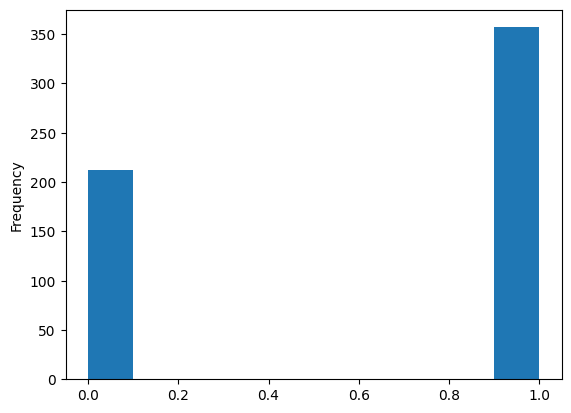

In [49]:
cancerdata['class'].plot.hist();

In [50]:
cancerdata.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [51]:
# predictors vs class
y = cancerdata['class']
X = cancerdata.drop('class', axis=1) # axis=1 means dropping from the column axis

X_min_max = X.copy()
for col in X_min_max.columns:
    if pd.api.types.is_numeric_dtype(X_min_max[col]):
        X_min_max[col] = (X_min_max[col] - X_min_max[col].min()) / (X_min_max[col].max() - X_min_max[col].min())
X = X_min_max.copy()
X['dummy1'] = 0.0
X['dummy2'] = 0.0

In [52]:
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [53]:
xtrain_samples = X_train.shape[0]
xtest_samples = X_test.shape[0]

print(f'There are {xtrain_samples} samples for training and {xtest_samples} samples for testing.')

There are 455 samples for training and 114 samples for testing.


In [54]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',verbose=1,gamma=1.0/32.0) # auto means, gamma = 1/nfeatures

In [55]:
svc.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 99
obj = -139.648558, rho = 0.051545
nSV = 188, nBSV = 184
Total nSV = 188


SVC(gamma=0.03125, verbose=1)

In [56]:
y_pred = svc.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



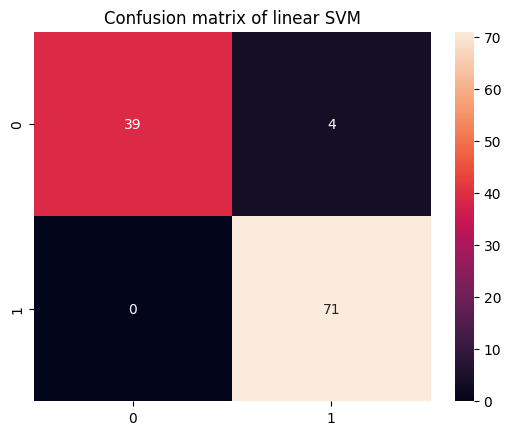

In [57]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM') # fmt='d' formats the numbers as digits, which means integers

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93       169
           1       0.93      1.00      0.96       286

    accuracy                           0.95       455
   macro avg       0.96      0.93      0.94       455
weighted avg       0.95      0.95      0.95       455



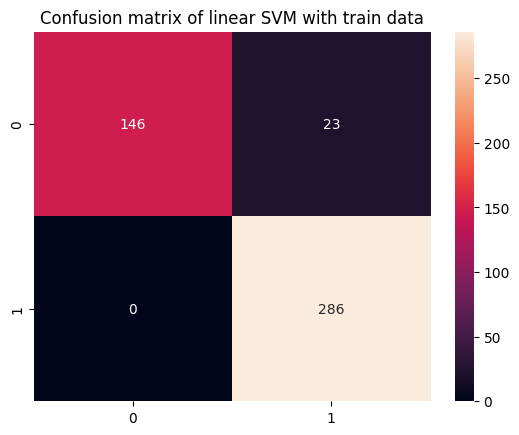

In [58]:
y_pred_train = svc.predict(X_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [59]:
svc.get_params()
print(svc.n_support_)

[93 95]


In [60]:
# get the actual output of SVM
decision_function = svc.decision_function(X_test)

In [61]:
print(decision_function)

[ 0.65961798 -0.93271557 -0.40810297  1.01948027  1.37276805 -3.00115924
 -2.28587496 -0.22413662  0.03170509  1.23058837  0.95974559 -0.19143404
  1.04406667 -0.16577195  1.17826498 -1.19477008  1.11303806  1.8237867
  2.23714425 -1.6539994   0.40887974  1.01186783 -2.47355828  1.84133208
  1.33534004  0.95873309  1.07675247  1.11326594  1.09879922 -1.49477755
  1.2539287   1.50167044  1.41903551  1.05184622  1.52584862  1.30508703
  0.24172086  1.3870082  -0.90833851  0.76103397  1.56248271 -0.4134278
  0.97970211  1.3091845   1.00386878  0.95812516  1.29978061  1.74881405
  0.86447876  1.09070207 -0.7756281  -1.80732876  0.28237349  0.75490748
  1.28609867  0.98653393  1.29211272 -3.23919644 -0.17294128  1.44040923
  1.00419969 -1.73825442 -1.8843454   0.91562956  1.47119236  0.67997231
 -1.27438971 -2.69540015  1.36947744  0.70338219 -0.36060611 -0.63175901
  1.10350683 -0.75169833  1.96349636  0.69218166  0.93645189  0.19837078
  1.84234681  0.76019989 -0.38324892  1.78529317  0.1

In [62]:
import numpy as np
print("svc.gamma: ", svc.gamma)
print("svc.degree: ", svc.degree)

sv=open("../data-kernel-model-rbf/support_vectors_rbf.txt","w")
dual_coeff=open("../data-kernel-model-rbf/dual_coeff_rbf.txt","w")
intercept=open("../data-kernel-model-rbf/intercept_rbf.txt","w")
xtestSample="../data-kernel-model-rbf/xtest_rbf.txt"
ytestSample="../data-kernel-model-rbf/ytest_rbf.txt"
ytestClassificationScore="../data-kernel-model-rbf/yclassificationscore.txt"

np.savetxt(sv,svc.support_vectors_)
    
np.savetxt(dual_coeff,svc.dual_coef_,delimiter=' ')
np.savetxt(intercept,svc.intercept_,delimiter=' ')

with open(xtestSample, "w") as f1:
    for item in X_test.head(1).iloc[0].values:
        f1.write(str(item) + " ")
        
np.savetxt(ytestSample,y_test.head(1), delimiter=' ')
with open(ytestClassificationScore, "w") as f2:
    f2.write(str(decision_function[0]))
    
sv.close()
dual_coeff.close()
intercept.close()
f1.close()
f2.close()

svc.gamma:  0.03125
svc.degree:  3
